# <Center> About Dataset <br><br>

<center> <img src="../images/shoping_cart.gif" alt="metodo de tamaño de muestra" width="450"> <br>

Context<br><br>
Problem Statement<br>
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. <br><br>
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content <br> <br>

Attributes<br><br>

People <br><br>
- ID: Customer's unique identifier <br>
- Year_Birth: Customer's birth year <br>
- Education: Customer's education level <br>
- Marital_Status: Customer's marital status <br>
- Income: Customer's yearly household income <br>
- Kidhome: Number of children in customer's household <br>
- Teenhome: Number of teenagers in customer's household <br>
- Dt_Customer: Date of customer's enrollment with the company <br>
- Recency: Number of days since customer's last purchase <br>
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise <br>

Products <br><br>
- MntWines: Amount spent on wine in last 2 years <br>
- MntFruits: Amount spent on fruits in last 2 years <br>
- MntMeatProducts: Amount spent on meat in last 2 years <br>
- MntFishProducts: Amount spent on fish in last 2 years <br>
- MntSweetProducts: Amount spent on sweets in last 2 years <br>
- MntGoldProds: Amount spent on gold in last 2 years <br>

Promotion <br><br>
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise <br>

Place <br><br>
- NumWebPurchases: Number of purchases made through the company’s website <br>
- NumCatalogPurchases: Number of purchases made using a catalogue <br>
- NumStorePurchases: Number of purchases made directly in stores <br>
- NumWebVisitsMonth: Number of visits to company’s website in the last month <br>

Target <br><br>
Need to perform clustering to summarize customer segments.

In [188]:
#Importing library 

from copy import deepcopy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from datetime import datetime

# quitar warnings
import warnings
#FutureWarning , seaborn
warnings.filterwarnings("ignore", category = FutureWarning, message="The figure layout has changed to tight")

In [189]:
# Import data set 
data = pd.read_csv('../data set/marketing_campaign.csv', sep = ';')
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0


# <p style="background-color:#0b032d;font-family:newtimeroman;color:#f4c095;font-size:150%;text-align:center ;border-radius:10px 10px;">Data Validation </p>

In [190]:
# shape of data 

print(f'The sahape of de data is: {data.shape}') 
data.dtypes

The sahape of de data is: (2240, 29)


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Nota:<br><br>
+ la variable "ID" debe ser eliminada 
+ Las siguientes variables deben ser transformadas<br>
    + 'Education'
    + 'Marital_Status'
    + 'Dt_Customer'



# Datos nulos 

c:\Users\anton\Proyectos_python\customer_personality_analysis_in_python\env-costumer\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


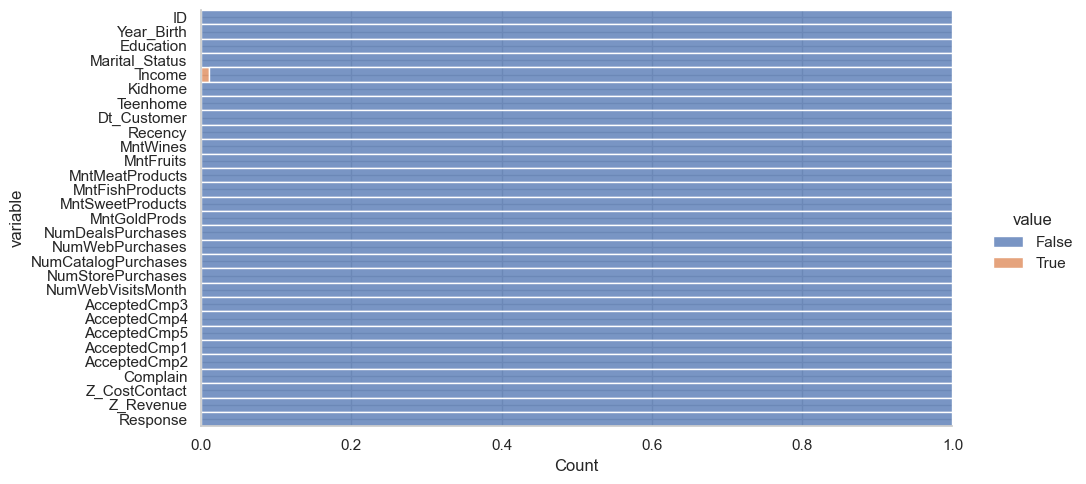

In [193]:
# para contar todos los valores en total cuento agrego la función sum dentro de la otra 
(
    data
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data= df,
                y='variable',
                hue='value',
                multiple="fill",
                aspect= 2
            )
        )

    )
);

# <p style="background-color:#0b032d;font-family:newtimeroman;color:#f4c095;font-size:150%;text-align:center;border-radius:10px 10px;">Data Description </p>

* La edad promedio de los clientes es de 54 años, con una desviación estandar de 11.98 <br>
* En promedio los consumidres son de clase media, estos contando con un ingreso de $52247, con una desviación estandar dde $25173 <br>
* En promedio los clientes no soluelen tener nicños ni adolecentes en casa, contando con un promedio infereiro a un niño/adolencente en casa. <br>
* En promedio los clientes llevan 26 días desde su última compra <br>
* En promedio los clientes se han gastado $305 en los últimos 2 años <br>
* EL promeddio de dinero gastado en vino en los dos ultimos años es de $305 <br>
* El promedio los clientes consumen $26 eb frutas <br>
* En promedio se consumen $166 de carne de res y $37.6 de pezcado por cliente <br> 
*


# <p style="background-color:#CACFD2 ;font-family:newtimeroman;color:#f4c095;font-size:150%;text-align:center;border-radius:10px 10px;">Data Validation </p>

# Data transforming 

In [133]:
data_copy = deepcopy(data)

# combertir en datatime
data_copy["Year_Birth"] = pd.to_datetime(data_copy["Year_Birth"], format= '%Y')

# Define la fecha de referencia (28 de julio de 2023)
date_reference = datetime(2023, 7, 28)

# Calcula la diferencia entre la fecha de referencia y la fecha de nacimiento
difence = date_reference - data_copy["Year_Birth"]

# Calcula la edad en años exactos a partir de la diferencia de fechas
data_copy["age"] = difence // pd.Timedelta(days=365.25)

# Muestra el DataFrame con la nueva columna de Edad
data_copy.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,0,0,0,0,0,0,3,11,0,69
